In [1]:
import os
import numpy as np
from utils import LR_logit_experiment

### CIFAR-10

In [2]:
DATA_DIR = "../data"
X = np.load(os.path.join(DATA_DIR, "CIFAR10_ResNet18_pretrain_X_test.npy"))
y = np.load(os.path.join(DATA_DIR, "CIFAR10_ResNet18_pretrain_y_test.npy"))
save_dir = "CIFAR-10/"
os.makedirs(save_dir, exist_ok=True)

In [3]:
# Dimension & Sample size
print(X.shape)
print(y.shape)

(10000, 512)
(10000,)


In [4]:
def get_plot(sub_class_list, pai, random_state, bins0, bins1, save=False):
    for idx_run, sub_class in enumerate(sub_class_list):
        X_sub = X[np.isin(y, sub_class), :]
        y_sub = y[np.isin(y, sub_class)]
        # re-level the labels as 0, 1, 2, ...
        for i in range(len(sub_class)):
            y_sub[y_sub == sub_class[i]] = i
            print(f"Class {sub_class[i]} is assigned as class {i}")
        _ = LR_logit_experiment(X_sub, y_sub, save_dir, pai=pai, random_state=random_state,
                                classes=sub_class,
                                whitening_rank=0, overlay_fitted_test_Gaussian=True,
                                title=rf'\textbf{{CIFAR-10, class {sub_class[0]} vs class {sub_class[1]}}}',
                                save=save, bins0=bins0, bins1=bins1)

Class 5 is assigned as class 0
Class 4 is assigned as class 1
Imbalanced training Set: {0: 500, 1: 55}
pi = 0.099
n = 555


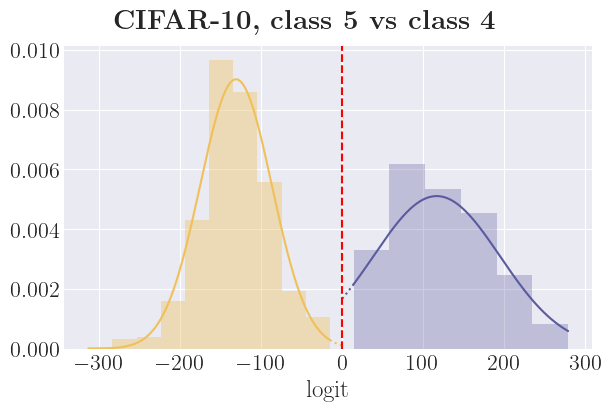

In [5]:
get_plot(sub_class_list=[[5, 4]], pai=0.1, random_state=2024, bins0=10, bins1=6, save=True)